In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

import pandas as pd
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [2]:
from weatherbench2.metrics import MAE, _spatial_average

In [3]:
import graphufs
from graphufs.lineplot import LinePlotter

/contrib2/Tim.Smith/graph-ufs/graphufs/training.py:59: UserWarning: Import failed for either mpi4py or mpi4jax.
  warnings.warn("Import failed for either mpi4py or mpi4jax.")


In [4]:
plt.style.use("graphufs.plotstyle")

In [5]:
fig_dir = "figures"
if not os.path.isdir(fig_dir):
    os.makedirs(fig_dir)

In [6]:
def swap_dims(xds):

    if "prediction_timedelta" in xds.coords and "lead_time" not in xds.coords:
        xds = xds.rename({"prediction_timedelta": "lead_time"})

    if "lead_time" in xds.coords:
        xds["fhr"] = (xds.lead_time.astype(int) / 3600 / 1e9).astype(int)
        xds = xds.swap_dims({"lead_time": "fhr"})
    return xds

In [7]:
def open_dataset(*args, **kwargs):
    xds = xr.open_dataset(*args, **kwargs)
    xds = swap_dims(xds)
    return xds

In [8]:
def open_zarr(*args, **kwargs):
    xds = xr.open_zarr(*args, **kwargs)
    xds = swap_dims(xds)
    return xds

In [19]:
errors = []
for latent_size in [64, 128, 256]:
    errors.append(
        open_dataset(
            f"/testlfs/latent-size-test-{latent_size:03d}/evaluation/validation/graphufs_vs_replay_240h_deterministic.nc"
        ).expand_dims({
            "latent_size": [latent_size],
        })
    )

errors = xr.concat(errors, dim="latent_size")

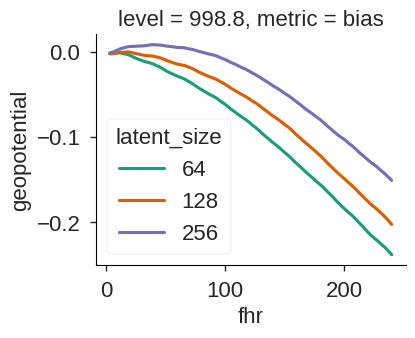

In [25]:
errors.geopotential.sel(metric="bias").sel(level=1000,method="nearest").plot.line(x="fhr")

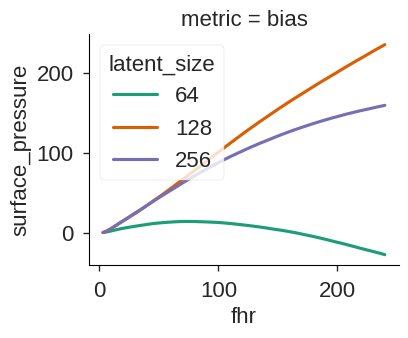

In [27]:
errors.surface_pressure.sel(metric="bias").plot.line(x="fhr")


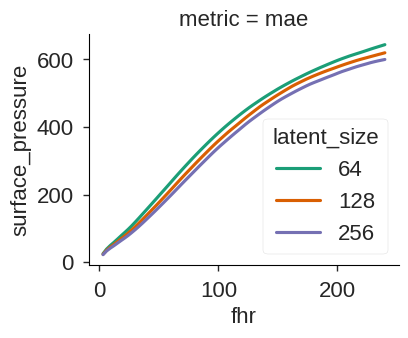

In [28]:

errors.surface_pressure.sel(metric="mae").plot.line(x="fhr")